In [1]:
%config Completer.use_jedi = False

# Problem 6: Random Forest for Tabular Data

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/petrol_consumption.csv')

In [4]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### Split the dataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Scale the dataset

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

### Train the model

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [47]:
rf = RandomForestRegressor(n_estimators=100)

In [48]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
y_pred = rf.predict(X_test)

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 52.31899999999998
Mean Squared Error: 8424.863249999999
Root Mean Squared Error: 91.78705382568937


In [51]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

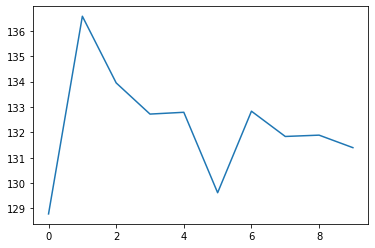

In [52]:
plt.plot([r_mse(y_pred[:i+1].mean(0), y_test) for i in range(10)])